## PUNTO 1 

##### Según el INDEC, una persona es considerada desocupada si durante la semana que se toma como referencia no tuvo trabajo, pero estaba disponible para empezar a trabajar y además estuvo buscando activamente empleo en las últimas cuatro semanas. Esta búsqueda puede ser de distintas formas, como mandar currículums, buscar avisos, hablar con conocidos, entre otras.

##### Esta clasificación se realiza a través de la Encuesta Permanente de Hogares (EPH), que es una herramienta que utiliza el INDEC para conocer la situación laboral, educativa y habitacional de la población. Es importante aclarar que si una persona no tiene trabajo, pero tampoco buscó activamente, no se la cuenta como desocupada, sino como inactiva.

##### También existe otra categoría llamada "ocupados demandantes", que son personas que sí tienen trabajo, pero están buscando uno mejor o más horas de trabajo. Todo esto ayuda a entender mejor el mercado laboral y cómo evoluciona el desempleo en el país.



## PUNTO 2 (A)

#### ACLARACIÓN: PARA REALIZAR LA UNION DE BASE DE DATOS, UTILIZAMOS EL ARCHIVO DTA.2004 Y LO TRANSFORMAMOS EN UN ARCHIVO 2004.XLSX, PARA QUE LOS DATOS QUEDEN MAS CLARO Y ASI DISMINUIR LOS ERRORES

In [3]:
import pandas as pd

# Cargarmos los archivos Excel 
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx')  
# Filtramos la region que elegimos en este caso la pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Filtrar la región Pampeana en 2024 (el codigo es el 43)
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# Unimos ambos DataFrames (2004 y 2024) en una sola base de datos
df_final = pd.concat([df_2004_pampeana, df_2024_pampeana], ignore_index=True)

# Guardarmos el resultado final en un nuevo archivo Excel
df_final.to_excel('resultado_pampeana.xlsx', index=False)

# Imprimir las primeras filas del resultado para verificar si es correcto el resultado
print(df_final.head())


   CODUSU  nro_hogar componente h15    ano4       trimestre    region mas_500  \
0  125051        1.0          1  S�  2004.0  1er. Trimestre  Pampeana       S   
1  125051        1.0          2  S�  2004.0  1er. Trimestre  Pampeana       S   
2  125051        1.0          3  S�  2004.0  1er. Trimestre  Pampeana       S   
3  125051        1.0          4  S�  2004.0  1er. Trimestre  Pampeana       S   
4  125051        1.0          5   0  2004.0  1er. Trimestre  Pampeana       S   

      aglomerado  pondera  ... PDECIFR ADECIFR IPCF DECCFR IDECCFR RDECCFR  \
0  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
1  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
2  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
3  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   
4  Gran La Plata    355.0  ...     NaN     NaN  NaN    NaN     NaN     NaN   

  GDECCFR PDECCFR ADECCFR PONDIH  
0     NaN

## PUNTO 2 (B)

### 2004

In [1]:
import pandas as pd

# Cargarmos los datos del 2004
df_2004 = pd.read_excel("usu_individual_T104.xlsx")

# Filtramos los datos para la región Pampeana 
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Seleccionamos las 15 variables
variables = ['ch03', 'ch04', 'nivel_ed', 'ch14', "idecocur" , "decocur", "pp11t", "ch06", "ch07", "ch08", "ch12", "cat_inac","pp04a","estado","ch16"]
df_2004_pampeana_vars = df_2004_pampeana[variables].copy()

# Verificamos celdas vacías: vamos a contar "" (cadenas vacías) y espacios en blanco
faltantes_2004_pampeana = df_2004_pampeana_vars.apply(lambda x: x.str.strip() == '').sum()

# Crear un DataFrame para mostrar los resultados
faltantes_2004_pampeana = pd.DataFrame({
    'Variable': faltantes_2004_pampeana.index,
    'Cantidad de Faltantes': faltantes_2004_pampeana.values
})

# Imprimir resultados
print("Valores vacíos o inconclusos para la region pampeana (2004):\n")
print(faltantes_2004_pampeana.to_string(index=False))



Valores vacíos o inconclusos para la region pampeana (2004):

Variable  Cantidad de Faltantes
    ch03                      0
    ch04                      0
nivel_ed                      0
    ch14                   7138
idecocur                   9139
 decocur                   9139
   pp11t                      0
    ch06                      0
    ch07                      0
    ch08                      0
    ch12                      0
cat_inac                      0
   pp04a                      0
  estado                      0
    ch16                      0


## 2024

In [2]:
import pandas as pd

# Cargamos el archivo Excel del año 2024
df_2024 = pd.read_excel("usu_individual_T124.xlsx")

# Filtramos la región Pampeana (43)
df_pampeana = df_2024[df_2024['REGION'] == 43].copy()

# Seleccionamos 15 variables de interés
variables_interes = [
    'CH03', 'CH04', 'CH06', 'CH07', 'NIVEL_ED', 
    'ESTADO', 'CAT_OCUP', 'PP04A', 'PP04B_COD', 'PP04G',"CH08" , "CH09", "CH10", "CH11","CH12"
]

# Subset del DataFrame con esas variables
df_pampeana_vars = df_pampeana[variables_interes].copy()

# Reemplazamos valores vacíos o espacios en blanco con NaN
df_pampeana_vars = df_pampeana_vars.replace(r'^\s*$', pd.NA, regex=True)

# Contamos faltantes por variable
faltantes = df_pampeana_vars.isna().sum()

# Creamos tabla de resultados
tabla_faltantes = pd.DataFrame({
    'Variable': faltantes.index,
    'Cantidad de Faltantes': faltantes.values
})

# Mostrar la tabla
print("Cantidad de valores faltantes por variable (Región Pampeana - 2024):\n")
print(tabla_faltantes.to_string(index=False))



Cantidad de valores faltantes por variable (Región Pampeana - 2024):

 Variable  Cantidad de Faltantes
     CH03                      0
     CH04                      0
     CH06                      0
     CH07                      0
 NIVEL_ED                      0
   ESTADO                      0
 CAT_OCUP                      0
    PP04A                   8108
PP04B_COD                   8108
    PP04G                   8108
     CH08                      0
     CH09                      0
     CH10                      0
     CH11                      0
     CH12                      0


# CONCLUSION
#### en este caso ambas tienen 3 variables que tienen espacios vacíos o inconclusos esto se debe a que no fueron contestados o dañados, aunque destacamos que la base de datos del 2024 esta mucho completa y ordenada a la hora de trabajar, ya que en la base de datos del 2004 las respuestas tenían mas variables insistentes, aunque generalmente en las principales ítems (sexo, estado civil, ocupación) ambas bases de datos tenian completa esa respuestas de manera ordenada y sencilla de interpretar.

## PUNTO 2 (C)

In [ ]:
import pandas as pd

# Cargamos datos 
# df = pd.read_csv("obtenido")

# Listado de variables que necesitemos limpiar
variables_interes = ["variable a analizar"]

# Definimos valores considerados como codificaciones de no respuesta o anómalos
valores_invalidos = [-9, -8, -1, 9999999]

# Reemplazamos estos valores por NaN
df[variables_interes] = df[variables_interes].replace(valores_invalidos, pd.NA)

# Además, eliminamos ingresos negativos que no tienen sentido (si aplica)
df['ingreso_total'] = df['ingreso_total'].mask(df['ingreso_total'] < 0, pd.NA)
df['ingreso_laboral'] = df['ingreso_laboral'].mask(df['ingreso_laboral'] < 0, pd.NA)
df['ingreso_no_laboral'] = df['ingreso_no_laboral'].mask(df['ingreso_no_laboral'] < 0, pd.NA)

# Eliminamos filas que tengan NaN en alguna de las variables de interés
df_limpio = df.dropna(subset=variables_interes)

# Verificamos
print(f"Filas originales: {len(df)}")
print(f"Filas luego de la limpieza: {len(df_limpio)}")


# CONCLUSION
#### EN ESTE CASO NO NOS ENCONTRAMOS CON UN INGRESO NEGATIVO, PERO SI LO TENDRIAMOS UTILIZARAMOS ESTA LINEA DE CODIGO PARA LOGRAR LIMPIAR LOS DATOS 

## PUNTO 3

## 2004

Columnas del archivo:
Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)


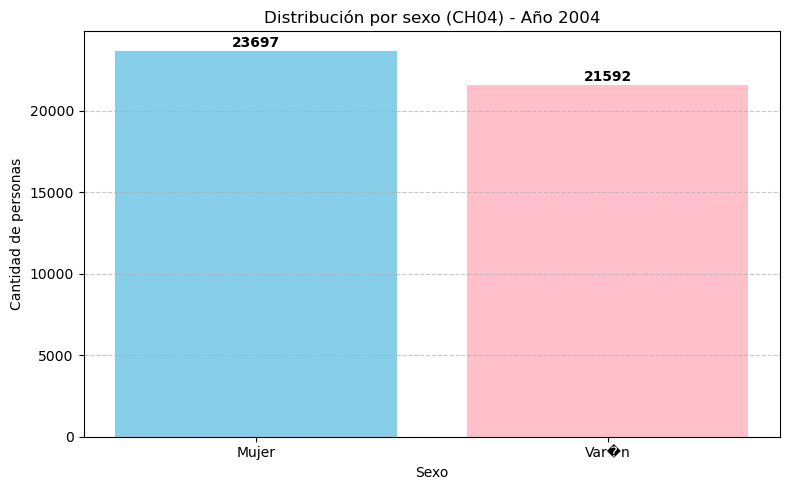


 Comentario:
En 2004 hubo más mujeres que varones.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos el archivo Excel (todo el archivo es del año 2004)
archivo = "usu_individual_T104.xlsx"
df = pd.read_excel(archivo)

# Verificamos las columnas 
print("Columnas del archivo:")
print(df.columns)

# Contamos cuántos hay por sexo (columna CH04)
conteo_sexo = df['ch04'].value_counts()

# Creamos gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(conteo_sexo.index, conteo_sexo.values, color=['skyblue', 'pink'])

# Agregamos Título y etiquetas
plt.title('Distribución por sexo (CH04) - Año 2004')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregamos etiquetas de cantidad encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 50,  # +50 para que no se superponga
             f'{int(altura)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Comentario en consola
print("\n Comentario:")
varones = conteo_sexo.get('Varón', 0)
mujeres = conteo_sexo.get('Mujer', 0)

if varones > mujeres:
    print(f"En 2004 hubo más varones que mujeres.")
elif mujeres > varones:
    print(f"En 2004 hubo más mujeres que varones.")
else:
    print(f"En 2004 hubo la misma cantidad de varones y mujeres.")



## 2024

Columnas del archivo:
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


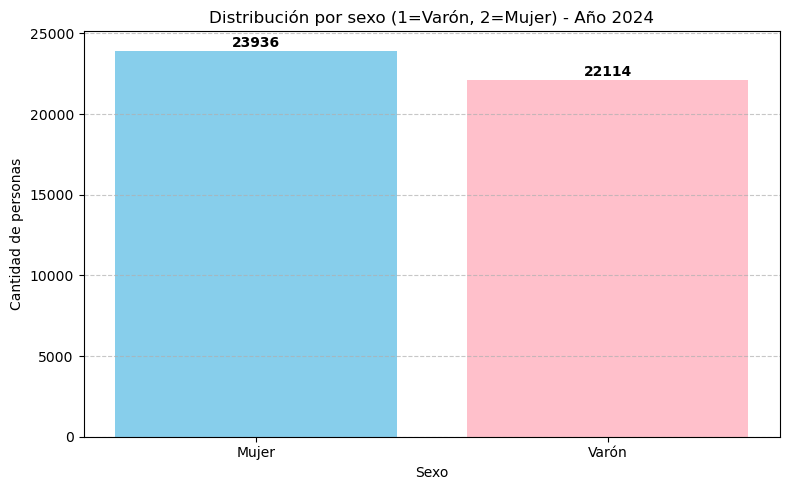

En 2024 hubo más mujereS que varones.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo Excel (todo el archivo corresponde a 2024)
archivo = "usu_individual_T124.xlsx"
df = pd.read_excel(archivo)

# Verificar las columnas (opcional)
print("Columnas del archivo:")
print(df.columns)

# Contar cuántos hay por sexo (discriminado por 1 para varones y 2 para mujeres en la columna 'Sexo')
# Cambiar 'Sexo' al nombre exacto de la columna en tu archivo
conteo_sexo = df['CH04'].value_counts()

# Mapear 1 -> Varón, 2 -> Mujer 
conteo_sexo.index = conteo_sexo.index.map({1: 'Varón', 2: 'Mujer'})

# Creamos gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(conteo_sexo.index, conteo_sexo.values, color=['skyblue', 'pink'])

# agregamos Títulos y etiquetas
plt.title('Distribución por sexo (1=Varón, 2=Mujer) - Año 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregamos etiquetas de cantidad encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 50,  # +50 para que no se superponga
             f'{int(altura)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Comentario en consola
varones = conteo_sexo.get('Varón', 0)
mujeres = conteo_sexo.get('Mujer', 0)

if varones > mujeres:
    print(f"En 2024 hubo más varones que mujeres.")
elif mujeres > varones:
    print(f"En 2024 hubo más mujereS que varones.")
else:
    print(f"En 2024 hubo la misma cantidad de varones y mujeres.")


In [ ]:
PUNTO 5

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Cargarmos los archivos Excel 
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx') 

# Filtramos la region que elegimos en este caso la pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Filtrar la región Pampeana en 2024 (el codigo es el 43)
df_2024_pampeana = df_2024[df_2024['REGION'] == 43] 

print("Columnas del archivo 2004:")
print(df_2004.columns)

print("\nColumnas del archivo 2024:")
print(df_2024.columns) 


Columnas del archivo 2004:
Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)

Columnas del archivo 2024:
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivos
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx')  

# Normalizar nombres de columnas
df_2004.columns = df_2004.columns.str.strip().str.lower()  # minúsculas para 2004
df_2024.columns = df_2024.columns.str.strip().str.upper()  # mayúsculas para 2024

# Filtrar región pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 43]
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# Columnas de interés
columnas_2004 = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
columnas_2024 = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Filtrar columnas
df_2004_filtrado = df_2004_pampeana[columnas_2004].copy()
df_2024_filtrado = df_2024_pampeana[columnas_2024].copy()

# Renombrar columnas del 2024 a minúsculas para unificarlas
df_2024_filtrado.columns = [col.lower() for col in df_2024_filtrado.columns]

# Agregar columna de año
df_2004_filtrado['año'] = 2004
df_2024_filtrado['año'] = 2024

# Unir ambos DataFrames
df_total = pd.concat([df_2004_filtrado, df_2024_filtrado], ignore_index=True)

# Mostrar primeras filas
print(df_total.head())



  ch04 ch06 ch07 ch08 nivel_ed estado cat_inac       ipcf   año
0    2   57    3    1        6      1        0       0.00  2024
1    1   35    5    1        6      1        0       0.00  2024
2    1   46    5    4        3      1        0  266666.67  2024
3    2   48    5    1        6      1        0  266666.67  2024
4    2   43    2    1        2      2        0   87500.00  2024


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivos
df_2004 = pd.read_excel('usu_individual_T104.xlsx')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx')  

# Normalizar nombres de columnas
df_2004.columns = df_2004.columns.str.strip().str.lower()  # minúsculas para 2004
df_2024.columns = df_2024.columns.str.strip().str.upper()  # mayúsculas para 2024

# Filtrar región pampeana
df_2004_pampeana = df_2004[df_2004['region'] == 'Pampeana']
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# Columnas de interés
columnas_2004 = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
columnas_2024 = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Filtrar columnas
df_2004_filtrado = df_2004_pampeana[columnas_2004].copy()
df_2024_filtrado = df_2024_pampeana[columnas_2024].copy()

# Renombrar columnas del 2024 a minúsculas para unificarlas
df_2024_filtrado.columns = [col.lower() for col in df_2024_filtrado.columns]

# Agregar columna de año
df_2004_filtrado['año'] = 2004
df_2024_filtrado['año'] = 2024

# Unir ambos DataFrames
df_total = pd.concat([df_2004_filtrado, df_2024_filtrado], ignore_index=True)

# Mostrar primeras filas
print(df_total.head())



    ch04 ch06     ch07                      ch08  \
0  Var�n   52   Casado  No paga ni le descuentan   
1  Mujer   40   Casado  No paga ni le descuentan   
2  Mujer   19  Soltero  No paga ni le descuentan   
3  Var�n   14  Soltero  No paga ni le descuentan   
4  Var�n    9  Soltero  No paga ni le descuentan   

                                           nivel_ed            estado  \
0                             Secundaria Incompleta           Ocupado   
1                             Secundaria Incompleta           Ocupado   
2                               Secundaria Completa           Ocupado   
3                             Secundaria Incompleta          Inactivo   
4  Primaria Incompleta (incluye educaci�n especial)  Menor de 10 a�os   

     cat_inac  ipcf   año  
0           0  71.4  2004  
1           0  71.4  2004  
2           0  71.4  2004  
3  Estudiante  71.4  2004  
4  Estudiante  71.4  2004  


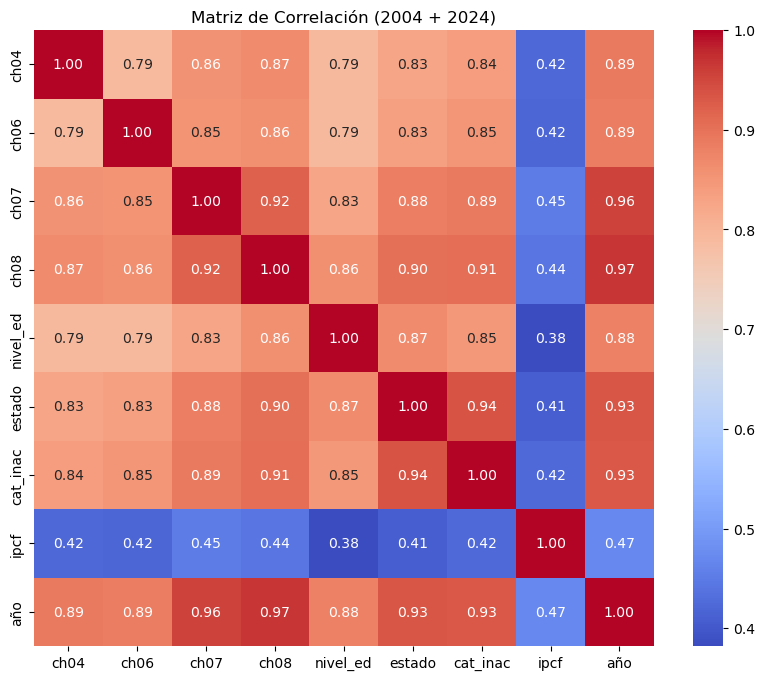

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hacemos una copia para no tocar el original
df_corr = df_total.copy()

# Convertimos columnas categóricas en números
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col], _ = pd.factorize(df_corr[col])

# Calculamos la matriz de correlación
corr_matrix = df_corr.corr(numeric_only=True)

# Mostramos la matriz con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (2004 + 2024)")
plt.show() 

In [ ]:
CONCLUSIONES PUNTO 4: La tabla muestra una matriz de correlación, donde cada celda representa el coeficiente de correlación de Pearson (r) entre dos variables. Este valor indica la relación lineal entre ellas, con un rango de -1 a 1:

1: Correlación positiva perfecta (si una variable aumenta, la otra también).

-1: Correlación negativa perfecta (si una variable aumenta, la otra disminuye).

0: No hay correlación lineal.

En la Matriz de correlacion las variables de edad, estado civil, nivel educativo, estado de actividad tienen alta correlacion entre si, indicando que estan bastante relacionadas. Por ejemplo, a mayor edad es esperable un mayor nivel educativo o cambios en el estado civil. 
La variable año tambien tiene alta correlacion con casi todas, lo cual es normal en analisis longitudinales: los perfiles demograficos cambian con el tiempo.
En cambio el ingreso per capita de familia tiene baja correlacion con las demas variables ya que es una variable economica con muchas variabilidad. ( A diferencia de las otras variables que son mas estructurales).


In [23]:
#EJERCICO 5

import pandas as pd

# Cargar archivos
df_2004 = pd.read_excel('usu_individual_T104.xlsx')
df_2024 = pd.read_excel('usu_individual_T124.xlsx')

# 1. Definir estados válidos en todas sus posibles variantes
estados_posibles = {
    'ocupado': ['Ocupado', 'OCUPADO', 'ocupado', 1, '1'],
    'desocupado': ['Desocupado', 'DESOCUPADO', 'desocupado', 2, '2'],
    'inactivo': ['Inactivo', 'INACTIVO', 'inactivo', 3, '3']
}

# 2. Función para normalizar cualquier formato a clave estandarizada
def normalizar_estado(estado):
    if pd.isna(estado):
        return None
    estado_str = str(estado).strip().lower()
    for key, variants in estados_posibles.items():
        if estado_str in [str(v).lower().strip() for v in variants]:
            return key
    return None

# 3. Filtrar región pampeana
df_2004_pampeana = df_2004[df_2004['region'].str.lower() == 'pampeana']
df_2024_pampeana = df_2024[df_2024['REGION'] == 43]

# 4. Normalizar estados en ambos dataframes
df_2004_filtrado = df_2004_pampeana.copy()
df_2004_filtrado['estado_normalizado'] = df_2004_pampeana['estado'].apply(normalizar_estado)

df_2024_filtrado = df_2024_pampeana.copy()
df_2024_filtrado['estado_normalizado'] = df_2024_pampeana['ESTADO'].apply(normalizar_estado)  

# 5. Filtrar solo los estados válidos
df_2004_filtrado = df_2004_filtrado.dropna(subset=['estado_normalizado'])
df_2024_filtrado = df_2024_filtrado.dropna(subset=['estado_normalizado'])

# 6. Conteo y media IPCF
conteo_2004 = df_2004_filtrado['estado_normalizado'].value_counts()
conteo_2024 = df_2024_filtrado['estado_normalizado'].value_counts()

media_ipcf_2004 = df_2004_filtrado.groupby('estado_normalizado')['ipcf'].mean().round(2)
media_ipcf_2024 = df_2024_filtrado.groupby('estado_normalizado')['IPCF'].mean().round(2)

# 7. Resultados
print("📅 2004 - Cantidad por estado:")
print(conteo_2004)
print("\n💰 IPCF promedio por estado - 2004:")
print(media_ipcf_2004)

print("\n📅 2024 - Cantidad por estado:")
print(conteo_2024)
print("\n💰 IPCF promedio por estado - 2024:")
print(media_ipcf_2024)

📅 2004 - Cantidad por estado:
estado_normalizado
inactivo      5812
ocupado       5682
desocupado    1035
Name: count, dtype: int64

💰 IPCF promedio por estado - 2004:
estado_normalizado
desocupado    197.42
inactivo      284.24
ocupado       383.96
Name: ipcf, dtype: float64

📅 2024 - Cantidad por estado:
estado_normalizado
ocupado       6302
inactivo      5909
desocupado     453
Name: count, dtype: int64

💰 IPCF promedio por estado - 2024:
estado_normalizado
desocupado     99393.79
inactivo      137703.88
ocupado       179600.56
Name: IPCF, dtype: float64


In [25]:
# EJERCICO 6 

import pandas as pd

# Cargar los datos de los archivos con los nombres correctos
df_2024 = pd.read_excel('usu_individual_T124.xlsx')
df_2004 = pd.read_excel('usu_individual_T104.xlsx')

# Filtrar solo la región 43 para 2024
df_2024_region_43 = df_2024[df_2024['REGION'] == 43]

# Filtrar las observaciones donde la condición de actividad es diferente de 0 (respondieron)
respondieron_2024 = df_2024_region_43[df_2024_region_43['ESTADO'] != 0]

# Filtrar las observaciones donde la condición de actividad es 0 (no respondieron)
norespondieron_2024 = df_2024_region_43[df_2024_region_43['ESTADO'] == 0]

# Filtrar solo la región Pampeana para 2004
df_2004_region_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Filtrar las observaciones donde la condición de actividad es diferente de 0 (respondieron)
respondieron_2004 = df_2004_region_pampeana[df_2004_region_pampeana['estado'] != 0]

# Filtrar las observaciones donde la condición de actividad es 0 (no respondieron)
norespondieron_2004 = df_2004_region_pampeana[df_2004_region_pampeana['estado'] == 0]

# Guardar todo en un solo archivo Excel con múltiples hojas
with pd.ExcelWriter('datos_respuesta_condicion_actividad_region.xlsx') as writer:
    # Guardar los datos de 2024
    respondieron_2024.to_excel(writer, sheet_name='Respondieron_2024', index=False)
    norespondieron_2024.to_excel(writer, sheet_name='NoRespondieron_2024', index=False)
    
    # Guardar los datos de 2004
    respondieron_2004.to_excel(writer, sheet_name='Respondieron_2004', index=False)
    norespondieron_2004.to_excel(writer, sheet_name='NoRespondieron_2004', index=False)

In [26]:
# Calcular totales
total_2024 = len(df_2024_region_43)
total_2004 = len(df_2004_region_pampeana)

noresp_2024 = len(norespondieron_2024)
noresp_2004 = len(norespondieron_2004)

# Mostrar resultados
print("=== RESUMEN DE NO RESPUESTAS ===")
print(f"Año 2024 (Región 43):")
print(f"  Total de personas: {total_2024}")
print(f"  No respondieron: {noresp_2024}")
print(f"  Porcentaje de no respuesta: {noresp_2024 / total_2024:.2%}\n")

print(f"Año 2004 (Región Pampeana):")
print(f"  Total de personas: {total_2004}")
print(f"  No respondieron: {noresp_2004}")
print(f"  Porcentaje de no respuesta: {noresp_2004 / total_2004:.2%}")

=== RESUMEN DE NO RESPUESTAS ===
Año 2024 (Región 43):
  Total de personas: 14410
  No respondieron: 15
  Porcentaje de no respuesta: 0.10%

Año 2004 (Región Pampeana):
  Total de personas: 14821
  No respondieron: 0
  Porcentaje de no respuesta: 0.00%


## PUNTO 7

Agreguen a la base respondieron una columna llamada “PEA” (Población Económicamente Activa) que tome 1 si están ocupados o
desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

### Resolución

Tomaremos primero el total de la cantidad de personas que respondieron junto a las que no respondieron

In [10]:
import pandas as pd

# Cargar los datos de 2024 y 2004
df_2024 = pd.read_excel("C:/Users/HP/OneDrive/Documentos/Big data/TPS/TP2 oficial/usu_individual_T124 (1).xlsx")
df_2004 = pd.read_excel("C:/Users/HP/OneDrive/Documentos/Big data/TPS/TP2 oficial/usu_individual_T104.xlsx")

# Filtrar solo la región 43 para 2024
df_2024_region_43 = df_2024[df_2024['REGION'] == 43]

# Filtrar las observaciones donde la condición de actividad es diferente de 0 (respondieron)
respondieron_2024 = df_2024_region_43[df_2024_region_43['ESTADO'] != 0]

# Filtrar las observaciones donde la condición de actividad es 0 (no respondieron)
norespondieron_2024 = df_2024_region_43[df_2024_region_43['ESTADO'] == 0]

# Filtrar solo la región Pampeana para 2004
df_2004_region_pampeana = df_2004[df_2004['region'] == 'Pampeana']

# Filtrar las observaciones donde la condición de actividad es diferente de 0 (respondieron)
respondieron_2004 = df_2004_region_pampeana[df_2004_region_pampeana['estado'] != 0]

# Filtrar las observaciones donde la condición de actividad es 0 (no respondieron)
norespondieron_2004 = df_2004_region_pampeana[df_2004_region_pampeana['estado'] == 0]

# Guardar todo en un solo archivo Excel con múltiples hojas
with pd.ExcelWriter('datos_respuesta_condicion_actividad_region.xlsx') as writer:
    respondieron_2024.to_excel(writer, sheet_name='Respondieron_2024', index=False)
    norespondieron_2024.to_excel(writer, sheet_name='NoRespondieron_2024', index=False)
    respondieron_2004.to_excel(writer, sheet_name='Respondieron_2004', index=False)
    norespondieron_2004.to_excel(writer, sheet_name='NoRespondieron_2004', index=False)

In [11]:
# Calcular totales
total_2024 = len(df_2024_region_43)
total_2004 = len(df_2004_region_pampeana)

noresp_2024 = len(norespondieron_2024)
noresp_2004 = len(norespondieron_2004)

resp_2024 = len(respondieron_2024)
resp_2004 = len(respondieron_2004)

# Mostrar resultados
print("=== RESUMEN DE RESPUESTAS Y NO RESPUESTAS ===\n")

print(f"Año 2024 (Región 43):")
print(f"  Total de personas: {total_2024}")
print(f"  No respondieron: {noresp_2024}")
print(f"  Porcentaje de no respuesta: {noresp_2024 / total_2024:.2%}")
print(f"  Respondieron: {resp_2024}")
print(f"  Porcentaje de respuesta: {resp_2024 / total_2024:.2%}\n")

print(f"Año 2004 (Región Pampeana):")
print(f"  Total de personas: {total_2004}")
print(f"  No respondieron: {noresp_2004}")
print(f"  Porcentaje de no respuesta: {noresp_2004 / total_2004:.2%}")
print(f"  Respondieron: {resp_2004}")
print(f"  Porcentaje de respuesta: {resp_2004 / total_2004:.2%}")

=== RESUMEN DE RESPUESTAS Y NO RESPUESTAS ===

Año 2024 (Región 43):
  Total de personas: 14410
  No respondieron: 15
  Porcentaje de no respuesta: 0.10%
  Respondieron: 14395
  Porcentaje de respuesta: 99.90%

Año 2004 (Región Pampeana):
  Total de personas: 14821
  No respondieron: 0
  Porcentaje de no respuesta: 0.00%
  Respondieron: 14821
  Porcentaje de respuesta: 100.00%


Agregamos a la base una columna llamada “PEA” que tome 1 si están ocupados o desocupados en ESTADO en la base de datos del 2004 y 2024, y a los que no entren dentro de este rango les asignara el valor 0:

In [23]:
# Agregar columna 'PEA' (1 si está ocupado o desocupado, 0 si no)

# Usamos .copy() para evitar SettingWithCopyWarning
respondieron_2024 = respondieron_2024.copy()
respondieron_2004 = respondieron_2004.copy()

respondieron_2024['PEA'] = respondieron_2024['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
respondieron_2004['PEA'] = respondieron_2004['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Ver las primeras filas de respondieron_2024 y verificar la nueva columna 'PEA'
print(respondieron_2024[['ESTADO', 'PEA']].head())

# Ver las primeras filas de respondieron_2004 y verificar la nueva columna 'PEA'
print(respondieron_2004[['estado', 'PEA']].head())

     ESTADO  PEA
38        1    1
39        1    1
67        1    1
68        1    1
111       2    1
                 estado  PEA
27204           Ocupado    0
27205           Ocupado    0
27206           Ocupado    0
27207          Inactivo    0
27208  Menor de 10 a�os    0


Realizamos un cuadro comparativo para mostrar la composición por PEA de cada año. 

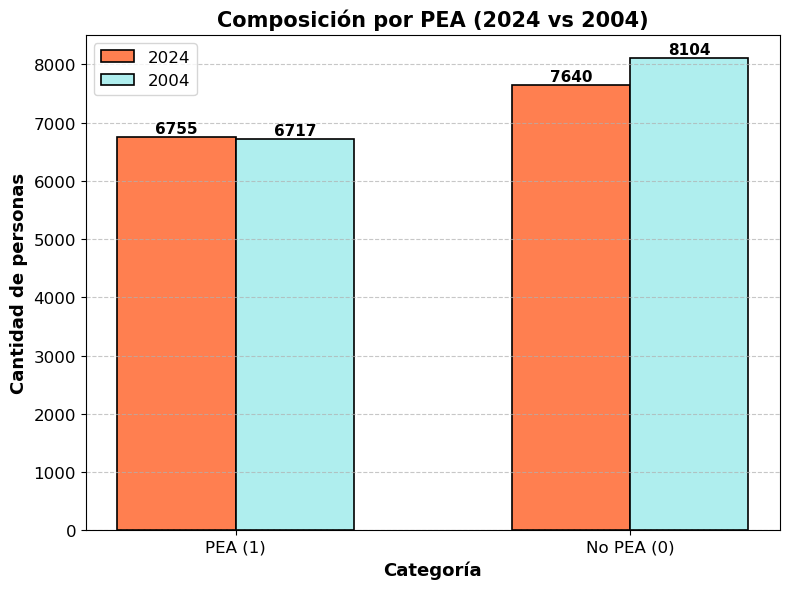

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Hacer copias seguras de los DataFrames filtrados
respondieron_2024 = respondieron_2024.copy()
respondieron_2004 = respondieron_2004.copy()

# Crear la columna "PEA" para ambos años
respondieron_2024['PEA'] = respondieron_2024['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
respondieron_2024['AÑO'] = 2024

respondieron_2004['PEA'] = respondieron_2004['estado'].apply(lambda x: 1 if x in ['Ocupado', 'Desocupado'] else 0)
respondieron_2004['AÑO'] = 2004

# Concatenar ambos DataFrames
respondieron_completo = pd.concat([respondieron_2024, respondieron_2004], ignore_index=True)

# Calcular los valores de PEA y no PEA para cada año
pea_2024 = respondieron_2024['PEA'].value_counts().sort_index(ascending=False)
pea_2004 = respondieron_2004['PEA'].value_counts().sort_index(ascending=False)

# Crear gráfico
labels = ['PEA (1)', 'No PEA (0)']
x = range(len(labels))

plt.figure(figsize=(8, 6))

# Crear barras con colores personalizados
plt.bar([i - 0.15 for i in x], pea_2024, width=0.3, label='2024', color='#FF7F50', edgecolor='black', linewidth=1.2)  # Coral
plt.bar([i + 0.15 for i in x], pea_2004, width=0.3, label='2004', color='#AFEEEE', edgecolor='black', linewidth=1.2)  # Celeste perlado

# Agregar etiquetas a las barras
for i, v in enumerate(pea_2024):
    plt.text(i - 0.15, v + 20, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

for i, v in enumerate(pea_2004):
    plt.text(i + 0.15, v + 20, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Títulos y etiquetas
plt.xlabel('Categoría', fontsize=13, fontweight='bold')
plt.ylabel('Cantidad de personas', fontsize=13, fontweight='bold')
plt.title('Composición por PEA (2024 vs 2004)', fontsize=15, fontweight='bold')

# Estilizar ejes
plt.xticks(x, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño y agregar la leyenda
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar gráfico
plt.show()

## PUNTO 8

Agreguen a la base respondieron una columna llamada “PET” (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y comparen PET con PEA.

### Resolución

Agregamos a la base respondieron la columna llamada "PET" que tome 1 si están la persona tiene entre 15 y 65 años cumplidos

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de 2024 y 2004
df_2024 = pd.read_excel("C:/Users/HP/OneDrive/Documentos/Big data/TPS/TP2 oficial/usu_individual_T124 (1).xlsx")
df_2004 = pd.read_excel("C:/Users/HP/OneDrive/Documentos/Big data/TPS/TP2 oficial/usu_individual_T104.xlsx")

# Filtrar solo la región 43 para 2024
df_2024_region_43 = df_2024[df_2024['REGION'] == 43].copy()

# Filtrar solo la región Pampeana para 2004
df_2004_region_pampeana = df_2004[df_2004['region'] == 'Pampeana'].copy()

# Crear columna 'PEA': 1 si ocupado o desocupado, 0 en otros casos
df_2024_region_43['PEA'] = df_2024_region_43['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
df_2004_region_pampeana['PEA'] = df_2004_region_pampeana['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Crear columna 'PET': 1 si tiene entre 15 y 65 años, 0 en caso contrario
df_2024_region_43['PET'] = df_2024_region_43['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Convertir edad a numérico y luego crear 'PET' en 2004
df_2004_region_pampeana['ch06'] = pd.to_numeric(df_2004_region_pampeana['ch06'], errors='coerce')
df_2004_region_pampeana['PET'] = df_2004_region_pampeana['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Verificamos visualmente las columnas nuevas
print("PEA y PET en 2024 (región 43):")
print(df_2024_region_43[['CH06', 'PET', 'PEA']].head())

print("\nPEA y PET en 2004 (región Pampeana):")
print(df_2004_region_pampeana[['ch06', 'PET', 'PEA']].head())

PEA y PET en 2024 (región 43):
     CH06  PET  PEA
38     57    1    1
39     35    1    1
67     46    1    1
68     48    1    1
111    43    1    1

PEA y PET en 2004 (región Pampeana):
       ch06  PET  PEA
27204  52.0    1    0
27205  40.0    1    0
27206  19.0    1    0
27207  14.0    0    0
27208   9.0    0    0


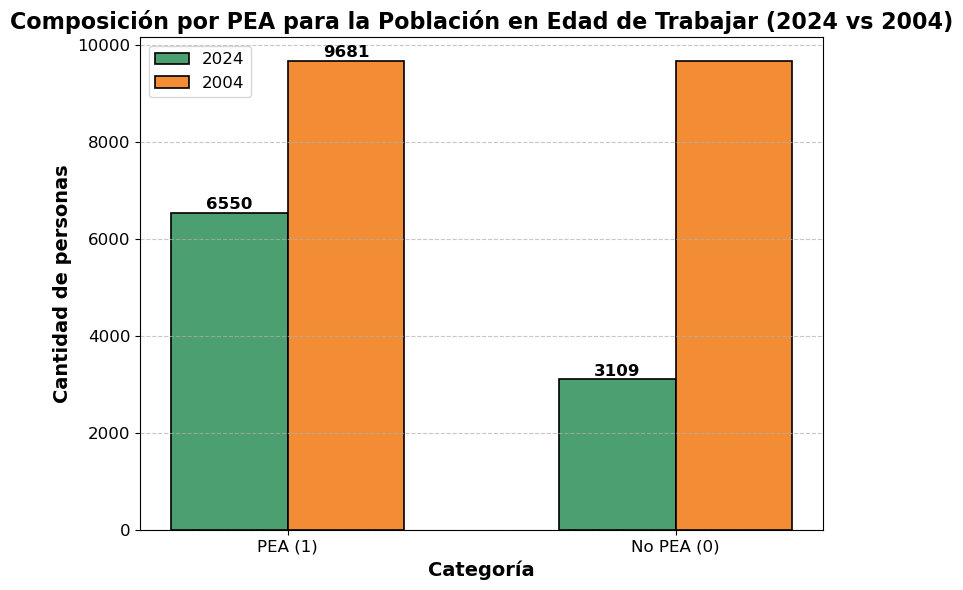

In [80]:
# Crear columnas PEA y PET
df_2024_region_43['PEA'] = df_2024_region_43['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)
df_2024_region_43['PET'] = df_2024_region_43['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

df_2004_region_pampeana['ch06'] = pd.to_numeric(df_2004_region_pampeana['ch06'], errors='coerce')
df_2004_region_pampeana['PEA'] = df_2004_region_pampeana['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
df_2004_region_pampeana['PET'] = df_2004_region_pampeana['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# --- FILTRO PARA VISUALIZACIÓN ---
# Solo los que están en edad de trabajar
respondieron_2024_pet = df_2024_region_43[df_2024_region_43['PET'] == 1]
respondieron_2004_pet = df_2004_region_pampeana[df_2004_region_pampeana['PET'] == 1]

# Conteo de PEA
pea_2024_pet = respondieron_2024_pet['PEA'].value_counts().sort_index(ascending=False)
pea_2004_pet = respondieron_2004_pet['PEA'].value_counts().sort_index(ascending=False)

# --- VISUALIZACIÓN ---
labels = ['PEA (1)', 'No PEA (0)']
x = range(len(labels))

plt.figure(figsize=(8, 6))

# Barras por año
plt.bar([i - 0.15 for i in x], pea_2024_pet, width=0.3, label='2024', color='#4C9F70', edgecolor='black', linewidth=1.2)
plt.bar([i + 0.15 for i in x], pea_2004_pet, width=0.3, label='2004', color='#F28D35', edgecolor='black', linewidth=1.2)

# Etiquetas encima de las barras
for i, v in enumerate(pea_2024_pet):
    plt.text(i - 0.15, v + 20, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

for i, v in enumerate(pea_2004_pet):
    plt.text(i + 0.15, v + 20, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Etiquetas y diseño
plt.xlabel('Categoría', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de personas', fontsize=14, fontweight='bold')
plt.title('Composición por PEA para la Población en Edad de Trabajar (2024 vs 2004)', fontsize=16, fontweight='bold')
plt.xticks(x, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar gráfico
plt.show()

Realizamos el gráfico de barras comparativo. 

## PUNTO 9 

Agreguen a la base respondieron una columna llamada “desocupado” que tome 1 si la persona está desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

### Resolución

Agregamos a la base respondieron una columna llamada “desocupado” que tome 1 si la persona está desocupada. 

In [309]:
import pandas as pd

# Cargar los datos de los archivos con los nombres correctos
df_2004 = pd.read_excel("C:/Users/HP/OneDrive/Documentos/Big data/TPS/TP2 oficial/usu_individual_T124 (1).xlsx")
df_2004 = pd.read_excel("C:/Users/HP/OneDrive/Documentos/Big data/TPS/TP2 oficial/usu_individual_T104.xlsx")

# Agregar columna 'PEA' para 2024 (1 si está ocupado o desocupado, según valores 1 y 2)
respondieron_2024['PEA'] = respondieron_2024['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)

# Agregar columna 'PEA' para 2004 (1 si está Ocupado o Desocupado, según strings)
respondieron_2004['PEA'] = respondieron_2004['estado'].apply(lambda x: 1 if x in ['Ocupado', 'Desocupado'] else 0)

# Mostrar las primeras filas para verificar la columna PEA
print("PEA en 2024:")
print(respondieron_2024[['PEA']].head())

print("\nPEA en 2004:")
print(respondieron_2004[['PEA']].head())

# Contar ocupados y desocupados en 2024
ocupados_2024 = respondieron_2024[respondieron_2024['ESTADO'] == 1].shape[0]
desocupados_2024 = respondieron_2024[respondieron_2024['ESTADO'] == 2].shape[0]

# Contar ocupados y desocupados en 2004
ocupados_2004 = respondieron_2004[respondieron_2004['estado'] == 'Ocupado'].shape[0]
desocupados_2004 = respondieron_2004[respondieron_2004['estado'] == 'Desocupado'].shape[0]

# Mostrar los resultados
print(f"\nOcupados en 2024: {ocupados_2024}")
print(f"Desocupados en 2024: {desocupados_2024}")
print(f"Ocupados en 2004: {ocupados_2004}")
print(f"Desocupados en 2004: {desocupados_2004}")

PEA en 2024:
     PEA
38     1
39     1
67     1
68     1
111    1

PEA en 2004:
       PEA
27204    1
27205    1
27206    1
27207    0
27208    0

Ocupados en 2024: 6302
Desocupados en 2024: 453
Ocupados en 2004: 5682
Desocupados en 2004: 1035


### 9(a) 

Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo?

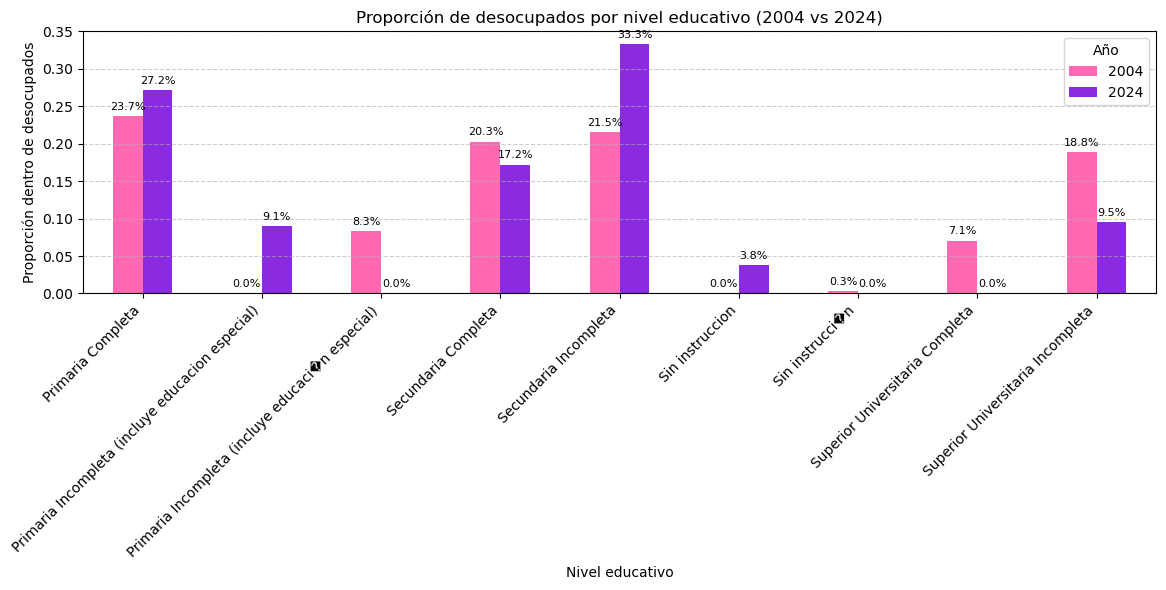

In [343]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario para mapear los niveles educativos en 2024
niveles_dict = {
    1: 'Sin instruccion',
    2: 'Primaria Incompleta (incluye educacion especial)',
    3: 'Primaria Completa',
    4: 'Secundaria Incompleta',
    5: 'Secundaria Completa',
    6: 'Superior Universitaria Incompleta',
    7: 'Superior Universitaria Completa'
}

# Filtrar desocupados y crear una copia explícita para evitar el SettingWithCopyWarning
desocupados_2024 = respondieron_2024[respondieron_2024['ESTADO'] == 2].copy()
desocupados_2004 = respondieron_2004[respondieron_2004['estado'] == 'Desocupado'].copy()

# Mapear niveles educativos con .loc para evitar warnings
desocupados_2024.loc[:, 'nivel_desc'] = desocupados_2024['NIVEL_ED'].map(niveles_dict)
desocupados_2004.loc[:, 'nivel_desc'] = desocupados_2004['nivel_ed']

# Agrupar por nivel educativo con nombres legibles
educacion_2024 = desocupados_2024['nivel_desc'].value_counts(normalize=True).sort_index()
educacion_2004 = desocupados_2004['nivel_desc'].value_counts(normalize=True).sort_index()

# Unir en un DataFrame
comparacion = pd.DataFrame({
    '2004': educacion_2004,
    '2024': educacion_2024
}).fillna(0)

# Crear gráfico
ax = comparacion.plot(kind='bar', figsize=(12, 6), color=['#FF69B4', '#8A2BE2'])  # Rosado y morado
plt.title('Proporción de desocupados por nivel educativo (2004 vs 2024)')
plt.xlabel('Nivel educativo')
plt.ylabel('Proporción dentro de desocupados')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Año')

# Agregar porcentajes sobre las barras
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, labels=[f'{v*100:.1f}%' for v in bars.datavalues], fontsize=8)

plt.show()

Sí, afirmativamente si hubo desocupados de acuerdo al nivel educativo, donde se puede evidenciar que en términos de proporción, los desocupados se concentran principalmente en el rango dentro de secundaria incompleta, destacándose sobre otros grupos.

### 9(b)

Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años. Muestre proporción de desocupados por edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

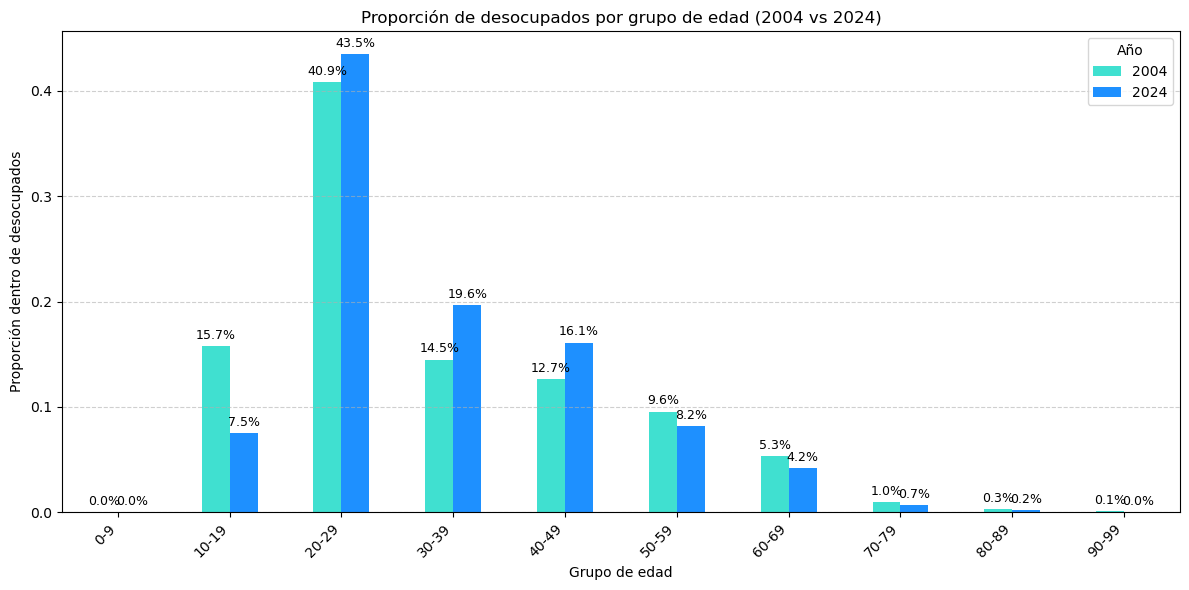

In [352]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear grupos etarios cada 10 años
bins = range(0, 101, 10)  # De 0 a 100 años, cada 10
labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Etiquetas: '0-9', '10-19', etc.

# Añadir columna de grupo etario
respondieron_2024['grupo_edad'] = pd.cut(respondieron_2024['CH06'], bins=bins, labels=labels, right=False)
respondieron_2004['grupo_edad'] = pd.cut(respondieron_2004['ch06'], bins=bins, labels=labels, right=False)

# Filtrar desocupados
desocupados_2024 = respondieron_2024[respondieron_2024['ESTADO'] == 2]
desocupados_2004 = respondieron_2004[respondieron_2004['estado'] == 'Desocupado']

# Proporción de desocupados por grupo de edad
edad_2024 = desocupados_2024['grupo_edad'].value_counts(normalize=True).sort_index()
edad_2004 = desocupados_2004['grupo_edad'].value_counts(normalize=True).sort_index()

# Unir resultados en un DataFrame
comparacion_edad = pd.DataFrame({
    '2004': edad_2004,
    '2024': edad_2024
}).fillna(0)

# Crear gráfico
ax = comparacion_edad.plot(kind='bar', figsize=(12, 6), color=['#40E0D0', '#1E90FF'])  # Verde agua y azul
plt.title('Proporción de desocupados por grupo de edad (2004 vs 2024)')
plt.xlabel('Grupo de edad')
plt.ylabel('Proporción dentro de desocupados')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Año')

# Mostrar porcentaje sobre cada barra (opcional)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', padding=3, labels=[f'{v*100:.1f}%' for v in bars.datavalues], fontsize=9)

plt.show()

Sí, afirmativamente si hubo desocupados de acuerdo a la edad, donde se puede evidenciar que en términos de proporción, los desocupados se concentran principalmente en el rango de edad de 20 a 29 años, destacándose sobre otros grupos etarios.

### 9(c)

Seleccione una (1) variable de interés y muestre las diferencias 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

La variable que eliguire para hacer la comparación es la variable sexo. 

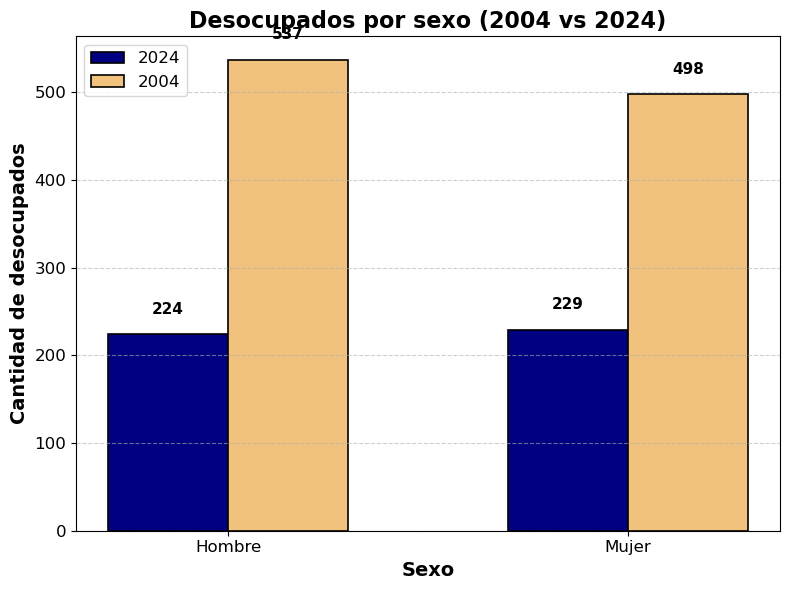

In [373]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar personas desocupadas
desocupados_2024 = respondieron_2024[respondieron_2024['ESTADO'] == 2]
desocupados_2004 = respondieron_2004[respondieron_2004['estado'] == 'Desocupado']

# Contar desocupados por sexo
sexo_2024 = desocupados_2024['CH04'].value_counts().sort_index()
sexo_2004 = desocupados_2004['ch04'].value_counts().sort_index()

# Etiquetas de sexo (puedes ajustar si tenés descripciones)
labels = ['Hombre', 'Mujer']
x = range(len(labels))

# Crear gráfico
plt.figure(figsize=(8,6))
plt.bar([i - 0.15 for i in x], sexo_2024, width=0.3, label='2024', color='#000080', edgecolor='black', linewidth=1.2)  # Azul marino
plt.bar([i + 0.15 for i in x], sexo_2004, width=0.3, label='2004', color='#F1C27D', edgecolor='black', linewidth=1.2)  # Piel
# Etiquetas de cantidad
for i, v in enumerate(sexo_2024):
    plt.text(i - 0.15, v + 20, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

for i, v in enumerate(sexo_2004):
    plt.text(i + 0.15, v + 20, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Títulos y estilo
plt.xlabel('Sexo', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de desocupados', fontsize=14, fontweight='bold')
plt.title('Desocupados por sexo (2004 vs 2024)', fontsize=16, fontweight='bold')
plt.xticks(x, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Sí, afirmativamente si hubo desocupados de acuerdo a la edad, donde se puede evidenciar que en términos de proporción, los desocupados se concentran principalmente en el rango de edad de 20 a 29 años, destacándose sobre otros grupos etarios. 